In [300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns



from numpy.random import uniform
from numpy.random import normal
from numpy.random import exponential
from numpy.random import lognormal

from numpy.random import choice
from numpy.random import permutation


from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro

from statsmodels.sandbox.stats.multicomp import multipletests
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
import matplotlib as PLT
PLT.rcParams.update({'figure.max_open_warning': 0})
PLT.rcParams.update({'font.size': 15})

PLT.rcParams['axes.linewidth'] = 2

PLT.rcParams['xtick.major.size'] = 3
PLT.rcParams['xtick.major.width'] = 2

PLT.rcParams['ytick.major.size'] = 3
PLT.rcParams['ytick.major.width'] = 2

In [3]:
#path='https://raw.githubusercontent.com/Annatkachev/StatLAB/refs/heads/main/DataTrans_1/'
path='/home/anna/PROJECTS2025/StatDatAnLAB/DataTrans/'

- variance explained formula

In [4]:
data=pd.read_csv(path+'blooddf.csv',index_col=0)
vol=pd.read_csv(path+'bloodsamples.csv',index_col=0)

1 

In [260]:
df=np.log2(data)

In [6]:
x=df['feature151']
y=df['feature152']

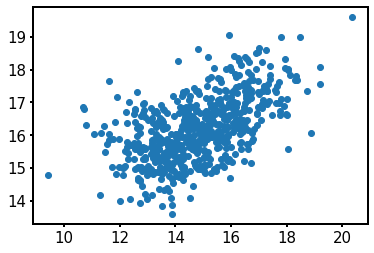

In [7]:
plt.scatter(x, y)

In [10]:
lr=LinearRegression()

In [11]:
lr.fit(df[['feature151']],df['feature152']).coef_

array([0.33930257])

In [21]:
lr.fit(df[['feature151']],df['feature152']).intercept_

11.168666060679156

In [97]:
beta=0.33930257
interc=11.168666
x=df['feature151']
y=df['feature152']

In [268]:
#A
#x=df['feature151']
#y=df['feature152']+2

#B
#x=df['feature151']
#y=2*df['feature152']

#C
x=df['feature171']
y=df['feature172']

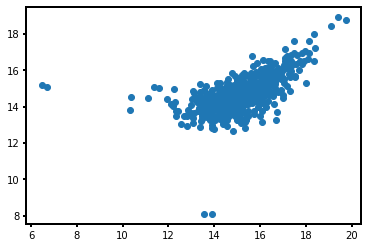

In [269]:
plt.scatter(x, y)

In [270]:
beta=lr.fit(pd.DataFrame(x),y).coef_
interc=lr.fit(pd.DataFrame(x),y).intercept_

In [271]:
beta, interc

(array([0.43655182]), 8.08830595996292)

In [272]:
1-(np.var(y-beta*x-interc)/np.var(y))

0.3552744533411224

In [273]:
1-(np.var(y-beta*x)/np.var(y))

0.3552744533411224

In [274]:
pearsonr(x,y)

(0.5960490360206301, 2.276265156692598e-59)

In [275]:
0.5960490360206301**2

0.3552744533411224

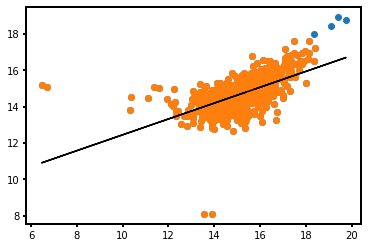

In [279]:
plt.scatter(x,y)
plt.plot(x,beta*x+interc,color='black')

plt.scatter(newx,newy)

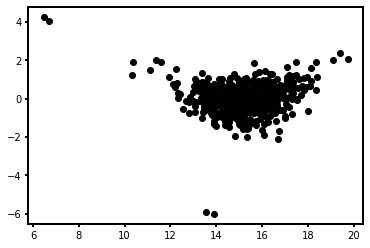

In [130]:

plt.scatter(x,y-(beta*x+interc),color='black')

In [112]:
1-(np.var(y-beta*x-interc)/np.var(y))

0.3081401688477814

In [113]:
pearsonr(x,y)

(0.5551037460221124, 4.087338780823886e-50)

In [114]:
0.5551037460221124**2

0.3081401688477819

- linear regression y over x

- variance of y explained by x

- correlation coefficient


In [22]:
#A
x=df['feature151']
y=df['feature152']+2

#B
x=df['feature151']
y=2*df['feature152']

#C
x=df['feature171']
y=df['feature172']

- how does anlaysis change?

- redo analysis with other features

2

In [243]:
df=data

In [244]:
x=df['feature171']
y=df['feature172']

In [245]:
ind=y.sort_values()[:-4].index
newx=x[ind]
newy=y[ind]

In [246]:
np.var(newy)/ np.var(y) 

0.39383036129568627

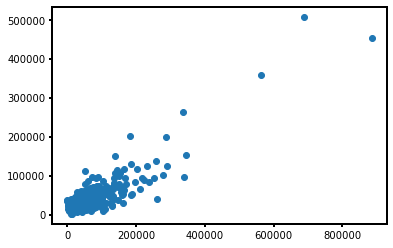

In [247]:
plt.scatter(x, y)

- how does the previous analysis look now?

- visualize residuals

- calculate variance of feature x and y

- take remove 4 largest points from dataset, how much does the variance change? Express in terms of ratio

- compare how much variance of residual changes, and how variance explained changes

- would the same thing happen for log-scaled data?

In [248]:
beta=lr.fit(pd.DataFrame(x),y).coef_
interc=lr.fit(pd.DataFrame(x),y).intercept_

In [249]:
newbeta=lr.fit(pd.DataFrame(newx),newy).coef_
newinterc=lr.fit(pd.DataFrame(newx),newy).intercept_

In [250]:
beta, interc

(array([0.49672709]), 7139.756174667276)

In [251]:
np.var(newy-newbeta*newx-newinterc)/np.var(y-beta*x-interc)

0.7263100287942169

In [256]:
#1-(np.var(y-beta*x-interc)/np.var(y))

In [257]:
pearsonr(x,y)

(0.8783053480841554, 4.349578688163254e-195)

In [258]:
pearsonr(newx,newy)

(0.7605580852356987, 2.897740895505893e-114)

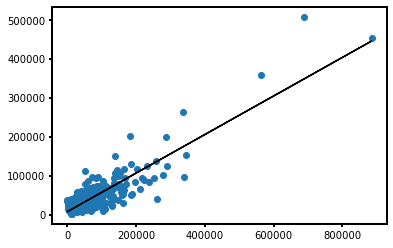

In [254]:
plt.scatter(x,y)
plt.plot(x,beta*x+interc,color='black')

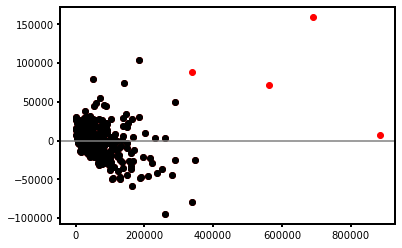

In [255]:

plt.scatter(x,y-(beta*x+interc),color='red')
plt.scatter(newx,newy-(beta*newx+interc),color='black')

plt.axhline(y=0,color='grey')

2

In [286]:
df=np.log2(data)

In [287]:
y=df['feature1']
ind1=vol[vol['sex']=='f'].index
ind2=vol[vol['sex']=='m'].index

(array([0.02339193, 0.14035156, 0.25731119, 0.79532548, 0.91228511,
        0.67836585, 0.56140622, 0.35087889, 0.11695963, 0.07017578]),
 array([12.12817608, 12.38416287, 12.64014965, 12.89613644, 13.15212323,
        13.40811001, 13.6640968 , 13.92008359, 14.17607037, 14.43205716,
        14.68804394]),
 <BarContainer object of 10 artists>)

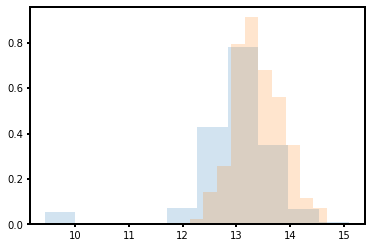

In [288]:
plt.hist(y[ind1],alpha=0.2,density=True)
plt.hist(y[ind2],alpha=0.2,density=True)

- variance of y explained by sex?

- for all features, compare this value to cohen's d or t t-stastics

 (also matches to correlation coeficcient)

In [297]:
tmp=pd.Series(index=vol.index)
tmp[vol[vol['sex']=='f'].index]=np.mean(y[ind1])
tmp[vol[vol['sex']=='m'].index]=np.mean(y[ind2])
    
1-(np.var((y-tmp)))/(np.var(y))

/home/anna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


0.057933313091698024

3

In [315]:
df=np.log2(data)

- Perform PCA analysis (for ex. 4 components), visualize results by age and sex 

- Obtain variance explained

- Obatin components, show their distribution

- What is variance explained? calculate directly

- take feature with highest component, visualize the relationship between PC1 and this feature

- PC2, caluculate variance explained between men and woman 

In [316]:
model=PCA(n_components=4).fit(df)
dfPCA=pd.DataFrame(model.transform(df),index=df.index,columns=['PC1','PC2','PC3','PC4'])

In [317]:
model_.explained_variance_ratio_

array([0.49652155, 0.09516255, 0.08279579, 0.04873973])

In [319]:
np.var(dfPCA['PC1'])/np.sum(np.var(df))

0.4965215536666437

4 

In [44]:
df=data

- What happens in original, log-normal scale?

- Look at the plots you obtain, by age and sex

- What about the variance explained? 

- What about the distribution of components? How do they relate to feature variance?

- take top 4 features with highest variance, and perform a new PCA analysis without overwritting previous results. Compare variance explained, the PC1 components of the two analysis, the PC2 components of the two anlaysis

In [47]:
dfa=data
dfb=np.log2(data)


- Do you think the log scale data would give similar picture?


- compare components vs variance for original scale and log scale

- should you or not use scaling (Z-score) before PCA?

5 

In [ ]:
df=data

- look at means of all features, variance of all features, their distribution
- how do the two relate? Why is it like this? 

In [45]:
df=np.log2(data)

- what about for log-scale data?

6 

- Properties of log

- log2FC, specific values

- Calculate examples in data